## Example 1: Spin-Bath model (Underdamped Case)
### Introduction

The HEOM method solves the dynamics and steady state of a system and its environment, the latter of which is encoded in a set of auxiliary density matrices.

In this example we show the evolution of a single two-level system in contact with a single Bosonic environment.  The properties of the system are encoded in Hamiltonian, and a coupling operator which describes how it is coupled to the environment.

The Bosonic environment is implicitly assumed to obey a particular Hamiltonian (see paper), the parameters of which are encoded in the spectral density, and subsequently the free-bath correlation functions.

In the example below we show how to model the overdamped Drude-Lorentz Spectral Density, commonly used with the HEOM. We show how to do this the Matsubara, Pade and fitting decompositions, and compare their convergence.  

### Drude-Lorentz (overdamped) spectral density
The Drude-Lorentz spectral density is:

$$J_D(\omega)= \frac{2\omega\lambda\gamma}{{\gamma}^2 + \omega^2}$$

where $\lambda$ scales the coupling strength, and $\gamma$ is the cut-off frequency.  We use the convention,
\begin{equation*}
C(t) = \int_0^{\infty} d\omega \frac{J_D(\omega)}{\pi}[\coth(\beta\omega) \cos(\omega \tau) - i \sin(\omega \tau)]
\end{equation*}

With the HEOM we must use an exponential decomposition:

\begin{equation*}
C(t)=\sum_{k=0}^{k=\infty} c_k e^{-\nu_k t}
\end{equation*}

As an example, the Matsubara decomposition of the Drude-Lorentz spectral density is given by:

\begin{equation*}
    \nu_k = \begin{cases}
               \gamma               & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    c_k = \begin{cases}
               \lambda \gamma (\cot(\beta \gamma / 2) - i)             & k = 0\\
               4 \lambda \gamma \nu_k / \{(nu_k^2 - \gamma^2)\beta \}    & k \geq 1\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.

###  Brownian motion (underdamped) spectral density
The underdamped spectral density is:

$$J_U = \frac{\alpha^2 \Gamma \omega}{(\omega_c^2 - \omega^2)^2 + \Gamma^2 \omega^2)}.$$

Here $\alpha$  scales the coupling strength, $\Gamma$ is the cut-off frequency, and $\omega_c$ defines a resonance frequency.  With the HEOM we must use an exponential decomposition:

The Matsubara decomposition of this spectral density is, in real and imaginary parts:



\begin{equation*}
    c_k^R = \begin{cases}
               \alpha^2 \coth(\beta( \Omega + i\Gamma/2)/2)/4\Omega & k = 0\\
               \alpha^2 \coth(\beta( \Omega - i\Gamma/2)/2)/4\Omega & k = 0\\
              -2\alpha^2\Gamma/\beta \frac{\epsilon_k }{((\Omega + i\Gamma/2)^2 + \epsilon_k^2)(\Omega - i\Gamma/2)^2 + \epsilon_k^2)}      & k \geq 1\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^R = \begin{cases}
               -i\Omega  + \Gamma/2, i\Omega  +\Gamma/2,             & k = 0\\
               {2 \pi k} / {\beta }  & k \geq 1\\
           \end{cases}
\end{equation*}




\begin{equation*}
    c_k^I = \begin{cases}
               i\alpha^2 /4\Omega & k = 0\\
                -i\alpha^2 /4\Omega & k = 0\\
           \end{cases}
\end{equation*}

\begin{equation*}
    \nu_k^I = \begin{cases}
               i\Omega  + \Gamma/2, -i\Omega  + \Gamma/2,             & k = 0\\
           \end{cases}
\end{equation*}

Note that in the above, and the following, we set $\hbar = k_\mathrm{B} = 1$.



In [1]:
%pylab inline
from qutip import *

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.
Populating the interactive namespace from numpy and matplotlib


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from heom_fmotd import BosonicHEOMSolver

In [4]:

def cot(x):
    return 1./np.tan(x)


def coth(x):
    """
    Calculates the coth function.
    
    Parameters
    ----------
    x: np.ndarray
        Any numpy array or list like input.
        
    Returns
    -------
    cothx: ndarray
        The coth function applied to the input.
    """
    return 1/np.tanh(x)

In [159]:
# Defining the system Hamiltonian
eps = .5     # Energy of the 2-level system.
Del = 1.0    # Tunnelling term
Hsys = 0.5 * eps * sigmaz() + 0.5 * Del* sigmax()




#technically zero!
Hsys = 0.*sigmaz() 

In [6]:
# Initial state of the system.
rho0 = basis(2,0) * basis(2,0).dag()  

rhotemp = (basis(2,0) + basis(2,1))
rho0  = 0.5*rhotemp*rhotemp.dag()

In [160]:
# System-bath coupling (Drude-Lorentz spectral density)
Q = sigmaz() # coupling operator

tlist = np.linspace(0, 600, 6000)

#Bath properties:
gamma = .5 # cut off frequency
lam = .15 # coupling strenght
w0 = 1 #resonance frequency
T = 1
beta = 1./T



#HEOM parameters
NC = 10 # cut off parameter for the bath




Text(0, 0.5, 'J')

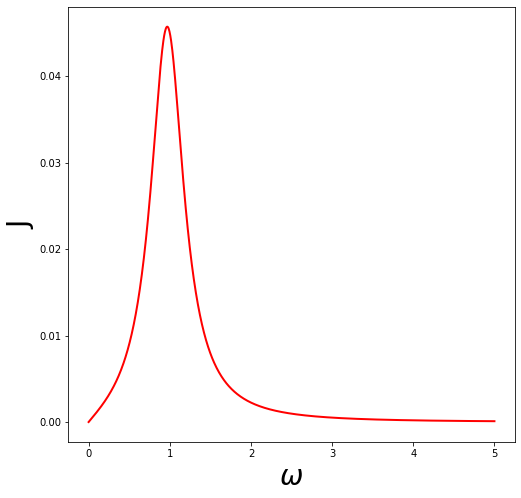

In [161]:




wlist = np.linspace(0, 5, 1000)
pref = 1.

J = [lam**2 * gamma * w / ((w0**2-w**2)**2 + (gamma**2)*(w**2)) for w in wlist]

# Plot the results
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(8,8))
axes.plot(wlist, J, 'r', linewidth=2)
axes.set_xlabel(r'$\omega$', fontsize=28)
axes.set_ylabel(r'J', fontsize=28)



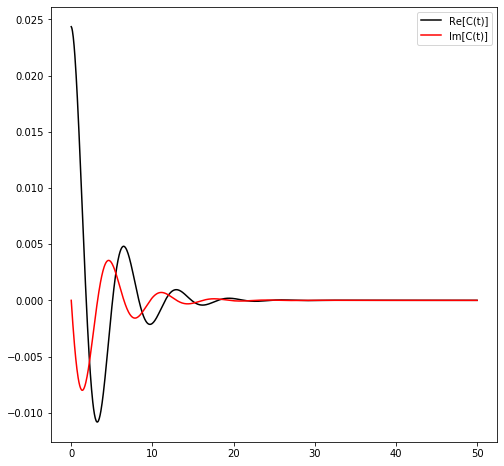

In [162]:
#first of all lets look athe correlation functions themselves
Nk = 1 # number of exponentials in approximation of the Matsubara approximation

Om = np.sqrt(w0**2 - (gamma/2)**2)
Gamma = gamma/2.

#mats
def Mk(t,k):
    ek = 2*pi*k/beta
    
    return (-2*lam**2*gamma/beta)*ek*exp(-ek*abs(t))/(((Om+1.0j*Gamma)**2+ek**2)*((Om-1.0j*Gamma)**2+ek**2))


def c(t):
    Cr = coth(beta*(Om+1.0j*Gamma)/2)*exp(1.0j*Om*t)+coth(beta*(Om-1.0j*Gamma)/2)*exp(-1.0j*Om*t)
    #Cr = coth(beta*(Om+1.0j*Gamma)/2)*exp(1.0j*Om*t)+conjugate(coth(beta*(Om+1.0j*Gamma)/2)*exp(1.0j*Om*t))
    Ci = exp(-1.0j*Om*t)-exp(1.0j*Om*t)
    return (lam**2/(4*Om))*exp(-Gamma*abs(t))*(Cr+Ci) + sum([Mk(t,k) for k in range(1,Nk)])


nsteps = 1000
tlist = np.linspace(0, 50, nsteps)

plt.figure(figsize=(8,8))


plt.plot(tlist,[real(c(t)) for t in tlist], '-', color="black", label="Re[C(t)]")
plt.plot(tlist,[imag(c(t)) for t in tlist], '-', color="red", label="Im[C(t)]")

plt.legend()
plt.show()


In [163]:
ckAR = [(lam**2/(4*Om))*coth(beta*(Om+1.0j*Gamma)/2),(lam**2/(4*Om))*coth(beta*(Om-1.0j*Gamma)/2)]

#ckAR.extend([(pref * 4 * lam * gamma * T *  2 * np.pi * k * T / (( 2 * np.pi * k * T)**2 - gamma**2))+0.j for k in range(1,Nk)])

vkAR = [-1.0j*Om+Gamma,1.0j*Om+Gamma]
#vkAR.extend([2 * np.pi * k * T + 0.j for k in range(1,Nk)])

#ckAI = [(lam/(4*Om)) + 0.j,-(lam/(4*Om)) - 0.j]

#vkAI = [1.0j*Om+Gamma,-1.0j*Om+Gamma]
factor=1./4.


ckAI =[-factor*lam**2*1.0j/(Om),factor*lam**2*1.0j/(Om)]
#ckAI =[factor*lam**2*1.0j/(Om),-factor*lam**2*1.0j/(Om)]

#vkAI = [-(-1.0j*(Om) - Gamma-1e-3),-(1.0j*(Om) - Gamma-1e-3)]
vkAI = [-(-1.0j*(Om) - Gamma),-(1.0j*(Om) - Gamma)]


In [68]:
ckAR

[(0.012175899245333119-0.002673413555243089j),
 (0.012175899245333119+0.002673413555243089j)]

In [69]:
vkAR

[(0.25-0.9682458365518543j), (0.25+0.9682458365518543j)]

In [70]:
ckAI

[(-0-0.005809475019311125j), 0.005809475019311125j]

In [71]:
vkAI

[(0.25+0.9682458365518543j), (0.25-0.9682458365518543j)]

In [152]:
NC=10

In [164]:

nsteps = 1000
tlist = np.linspace(0, 500, nsteps)

NR = len(ckAR)
NI = len(ckAI)
Q2 = [Q for kk in range(NR+NI)]
print(Q2)
options = Options(nsteps=15000, store_states=True, rtol=1e-14, atol=1e-14)

HEOM = BosonicHEOMSolver(Hsys, Q2, ckAR, ckAI, vkAR, vkAI, NC, options=options)


result = HEOM.run(rho0, tlist)


[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]]
SIMPL DUN
SIMPL DUN
4
[Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]], Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]]
2
making python csr matrix


In [165]:
# Define some operators with which we will measure the system
# 1,1 element of density matrix - corresonding to groundstate

Pg2 = expect(result.states,sigmaz())
Pgg2 = expect(result.states,destroy(2).dag())

In [166]:

def correlation_integral(t, ck, vk):
    """
    Computes the integral sum function appearing in the pure dephasing model.
    
    If the correlation function is a sum of exponentials then this sum
    is given by:
    
    .. math:
        
        \int_0^{t}d\tau D(\tau) = \sum_k\frac{c_k}{\mu_k^2}e^{\mu_k t}
        + \frac{\bar c_k}{\bar \mu_k^2}e^{\bar \mu_k t}
        - \frac{\bar \mu_k c_k + \mu_k \bar c_k}{\mu_k \bar \mu_k} t
        + \frac{\bar \mu_k^2 c_k + \mu_k^2 \bar c_k}{\mu_k^2 \bar \mu_k^2}
        
    Parameters
    ----------
    t: float
        A float specifying the time at which to calculate the integral.
    
    ck: ndarray
        The list of coefficients in the correlation function.
        
    vk: ndarray
        The list of frequencies in the correlation function.
    
    Returns
    -------
    integral: float
        The value of the integral function at time t.
    """
    t1 = np.sum(np.multiply(np.divide(ck, vk**2), np.exp(vk*t) - 1))
    
    t2 = np.sum(np.multiply(np.divide(np.conjugate(ck), np.conjugate(vk)**2),
                            np.exp(np.conjugate(vk)*t) - 1))
    t3 = np.sum((np.divide(ck, vk) + np.divide(np.conjugate(ck), np.conjugate(vk)))*t)

    return 2*(t1+t2-t3)



In [167]:
#note that in this exact solution we also 'neglect' the matsubara terms. so technically not exact, but just to make clear what
#we are looking at.


at = np.real(coth((beta*(Om+1.0j*Gamma)/2.)))
bt = np.imag(coth((beta*(Om+1.0j*Gamma)/2.)))

#at = np.real(coth((beta*(wrc1)/2.)))
#bt = np.imag(coth((beta*(wrc1)/2.)))



ck1 = np.array([(lam**2/(4*Om))*(at-1+1.0j*bt),(lam**2/(4*Om))*(at+1-1.0j*bt)])
vk1 = np.array([1.0j*Om-Gamma,-1.0j*Om-Gamma])
print(ck1)
print(vk1)
#ck1,vk1 = analytical_exponentials_non_matsubara(gamma, sqrt(lam), w0, beta)
print(ck1)
print(vk1)

exact_evolution = 0.5*np.array([np.exp(- correlation_integral(t, ck1, vk1)) for t in tlist])
#exact_evolution = 0.5*np.array([np.exp(- correlation_integral(t, ck1, vk1)
#                                       - quad(integrand2, 0, np.inf, args=(t))[0]) for t in tlist])

[0.00636642-0.00267341j 0.01798537+0.00267341j]
[-0.25+0.96824584j -0.25-0.96824584j]
[0.00636642-0.00267341j 0.01798537+0.00267341j]
[-0.25+0.96824584j -0.25-0.96824584j]


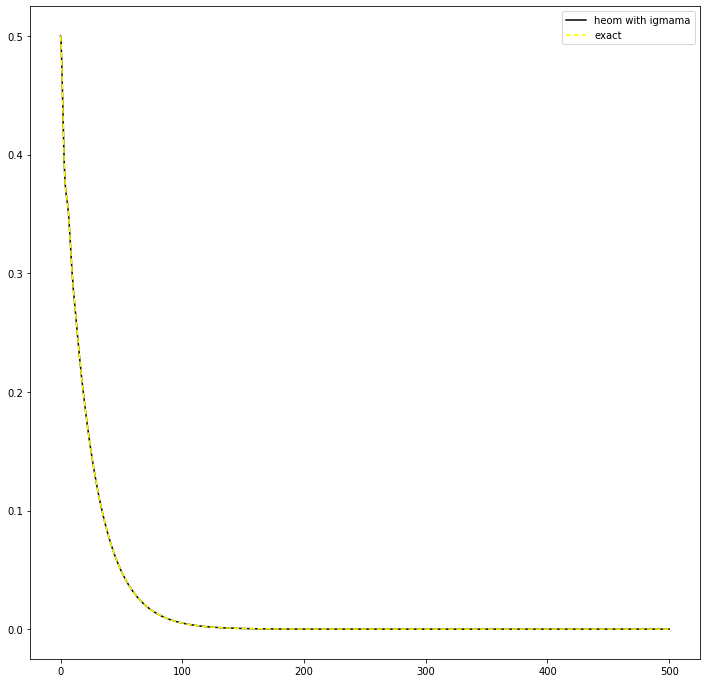

In [168]:



plt.figure(figsize=(12,12))

plt.plot(tlist,np.real(Pgg2), '-', color="black", label="heom with igmama")

plt.plot(tlist,exact_evolution, '--', color="yellow", label="exact")



plt.legend()
plt.show()

In [78]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.5.0.dev0
Numpy,1.18.1
SciPy,1.4.1
matplotlib,3.1.2
Cython,0.29.14
Number of CPUs,4
BLAS Info,INTEL MKL
IPython,7.11.1
Python,"3.7.3 (default, Mar 27 2019, 22:11:17) [GCC 7.3.0]"
OS,posix [linux]


In [79]:

gamma = 0.05
w0=1.0


lam =0.2
Gamma = gamma/2.
Om = np.sqrt(w0**2 - Gamma**2)
factor=1./4.
ckAR= [factor*lam**2/(Om),factor*lam**2/(Om)]
#note:  the frequencies here are NEGATIVE from their nomral def
vkAR= [-(1.0j*Om - Gamma),-(-1.0j*Om - Gamma)]

ckAI =[-factor*lam**2*1.0j/(Om),factor*lam**2*1.0j/(Om)]
#ckAI =[factor*lam**2*1.0j/(Om),-factor*lam**2*1.0j/(Om)]

#vkAI = [-(-1.0j*(Om) - Gamma-1e-3),-(1.0j*(Om) - Gamma-1e-3)]
vkAI = [-(-1.0j*(Om) - Gamma),-(1.0j*(Om) - Gamma)]





NR=2
NI=2
# Q = sigmax()
Q = [sigmax(), sigmax(), sigmax(), sigmax()]
Del = 0.#np.pi/2.    
wq = 1.0     # Energy of the 2-level system.
Hsys = 0.5 * wq * sigmaz() + 0.5 * Del * sigmax()
# Hsys = 1

#tlist = np.linspace(0, 7.777777777777778, 36)
tlist = np.linspace(0, 200, 4000)
    
#for amirs Omega= pi data, tlist is different (actually a bit weird)
#tlist=tlistA
initial_state = basis(2,1) * basis(2,1).dag()                # Initial state of the system.


#return_vals = [tensor(qeye(N), kk) for kk in [Q]]            # List for which to calculate expectation value
return_vals = [initial_state, basis(2,0) * basis(2,1).dag()   ]            # List for which to calculate expectation value
eigen_sparse = False
calc_time = True                                             
options = Options(nsteps=15000, store_states=True,rtol=1e-12, atol=1e-12)        # Options for the solver.


#Convergence parameters
#we need very high Nc to get convergence.  might be interesting to understand why
Nc = input("nc: ")
Nc = int(Nc)

# results1Nc7 = a.hsolve(Hsys, Q,ckAR,ckAI,vkAR,vkAI, Nc, NR,NI, tlist, initial_state, options=options,\
    # progress_bar1=TextProgressBar(),progress_bar2=TextProgressBar())

# print("here")
# note that this expects the cks and vks as lists and not numpy arrays
# Hsys = liouvillian(Hsys)
def func(x):
    return 0.0*cos(x)
#Hsys = [Hsys, [sigmax(), func]]
#Hsys = Hsys
#L = liouvillian(Hsys,[])
A = BosonicHEOMSolver(Hsys, Q,ckAR,ckAI,vkAR,vkAI, Nc, options=options)
print("starting solve")
B, blerg= A.run(initial_state, tlist)

fig, ax1 = plt.subplots(figsize=(12, 7))
ax1.plot(tlist,expect(B.states,1-initial_state*initial_state.dag()))



KeyboardInterrupt: 